In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Airline_Reviews_Labeled.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display first few rows of the dataset
print("\nFirst few rows:")
print(df.head())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        

In [5]:
# Describe the dataset to get an overview of numerical features
print("\nDataset Description:")
print(df.describe())


Dataset Description:
        Unnamed: 0  Seat Comfort  Cabin Staff Service  Food & Beverages  \
count  23171.00000  19016.000000         18911.000000      14500.000000   
mean   11585.00000      2.618321             2.871609          2.553586   
std     6689.03588      1.464844             1.604631          1.526314   
min        0.00000      0.000000             0.000000          0.000000   
25%     5792.50000      1.000000             1.000000          1.000000   
50%    11585.00000      3.000000             3.000000          2.000000   
75%    17377.50000      4.000000             4.000000          4.000000   
max    23170.00000      5.000000             5.000000          5.000000   

       Ground Service  Inflight Entertainment  Wifi & Connectivity  \
count    18378.000000            10829.000000          5920.000000   
mean         2.353738                2.178964             1.780405   
std          1.595747                1.488758             1.318800   
min          1.000000 

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
sarcasm                       0
dtype: int64


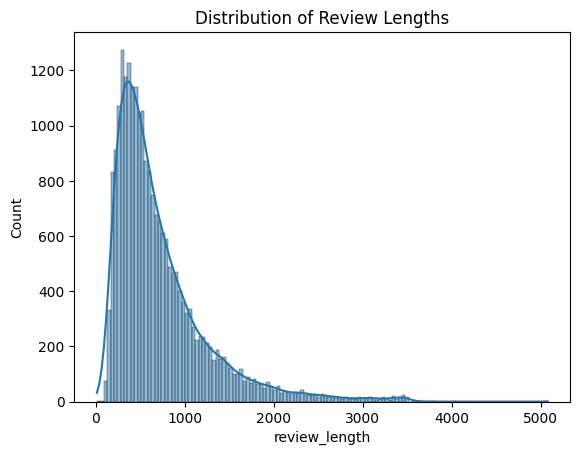

In [11]:
# Analyze the length of reviews
df['review_length'] = df['Review'].apply(len)
sns.histplot(df['review_length'], kde=True)
plt.title('Distribution of Review Lengths')
plt.show()

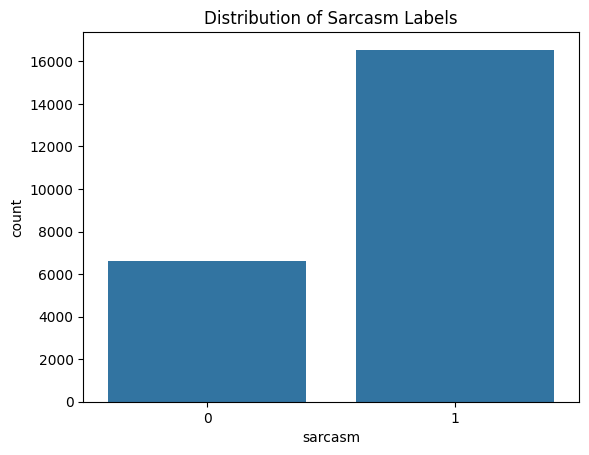

In [9]:
# Visualize the distribution of the target variable (sarcasm labels)
sns.countplot(x='sarcasm', data=df)
plt.title('Distribution of Sarcasm Labels')
plt.show()

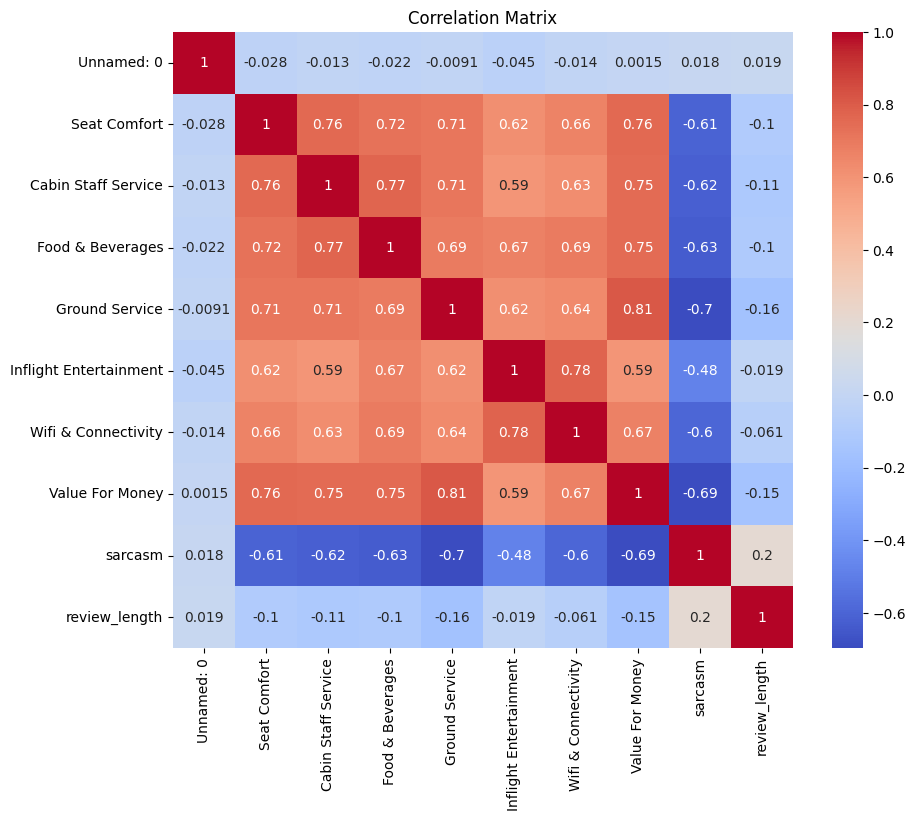

In [13]:
# Select only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Display the correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK data packages are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
# Text Cleaning
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

In [17]:
df['cleaned_review'] = df['Review'].apply(clean_text)

# Tokenization
df['tokens'] = df['cleaned_review'].apply(word_tokenize)

<ipython-input-15-153936503a16>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags


In [18]:
# Stop Words Removal
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [19]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [20]:
# Handling Missing Values
df = df.dropna(subset=['cleaned_review'])

In [21]:
# Feature Engineering
df['review_length'] = df['cleaned_review'].apply(len)
df['num_exclamations'] = df['cleaned_review'].apply(lambda x: x.count('!'))

In [22]:
# Save preprocessed data
df.to_csv('preprocessed_airline_reviews.csv', index=False)